In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [20]:
df = pd.read_csv('trainingData.csv',usecols=[str(i) for i in range(21)]+['Label'])

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Label
0,168.673147,146.269848,131.381712,140.868097,169.287757,57.005112,78.173262,113.449011,146.557195,27.168117,...,138.080073,59.697746,61.599412,95.558568,128.812200,107.480505,115.054281,129.018315,143.500330,stop
1,182.246979,165.914664,155.992398,162.842780,189.395679,55.679863,73.411168,106.794014,137.396228,26.655823,...,144.930392,61.822014,70.185533,102.954495,135.945050,107.901231,118.507824,136.115006,155.552195,stop
2,210.253383,188.543943,170.026355,169.795422,195.215899,56.924424,71.784131,107.860843,143.115703,25.721207,...,152.647460,58.180422,69.244972,106.426185,144.008794,104.693701,114.273730,135.982525,160.651826,stop
3,211.114868,189.590189,168.458026,169.230786,193.393288,57.086083,71.853103,105.943435,141.271983,25.689759,...,150.529263,57.503722,68.395293,104.881847,144.209378,103.567148,114.420327,134.437140,157.717233,stop
4,212.309661,190.892046,169.804543,169.578643,193.374450,56.696871,72.879626,106.699453,141.869363,25.057304,...,151.494183,56.650658,68.027739,104.890927,145.024832,102.738744,114.326233,134.519292,158.772709,stop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,83.964413,69.886805,70.807746,93.323675,126.221928,47.476549,30.914996,18.048184,20.381453,43.083240,...,11.630166,48.033459,35.515574,30.167371,30.437662,64.758333,60.109217,56.788445,54.185078,yes
196,85.158223,70.091566,70.924971,92.149563,122.981489,49.721309,32.922984,18.945261,20.628668,44.130424,...,13.029967,50.390088,36.038591,30.112789,30.734951,65.362499,61.842496,57.763632,55.258001,yes
197,79.556780,70.614279,74.926918,91.544396,118.248911,50.098904,33.962097,17.076724,15.848847,38.435416,...,9.949646,43.114413,37.511842,32.766784,31.978344,60.781382,61.739046,58.503522,57.048811,yes
198,90.502277,73.053765,71.384240,92.249120,122.478745,49.907965,40.930781,20.269499,13.576774,36.331086,...,11.561234,40.040399,38.945569,32.682386,32.937824,59.002383,59.833063,58.232255,58.883220,yes


In [22]:
for i in range(200):
    if df['Label'][i]=='stop':
        df['Label'][i]=1
    elif df['Label'][i]=='up':
        df['Label'][i]=2
    elif df['Label'][i]=='victory':
        df['Label'][i]=3
    elif df['Label'][i]=='yes':
        df['Label'][i]=4


C:\Users\NIDHIS~1\AppData\Local\Temp/ipykernel_20196/2167636378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][i]=1
C:\Users\NIDHIS~1\AppData\Local\Temp/ipykernel_20196/2167636378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][i]=2
C:\Users\NIDHIS~1\AppData\Local\Temp/ipykernel_20196/2167636378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][i]=3
C:\Users\NIDHIS~1\AppData\Local\Temp/ipy

In [39]:
y = df['Label']
y = y.astype('int')
X = df.drop('Label',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [40]:
y_test.shape

(60,)

In [60]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=600)

In [61]:
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [62]:
predictions

array([1, 3, 1, 2, 2, 3, 2, 2, 3, 3, 3, 3, 4, 2, 3, 3, 1, 1, 4, 1, 4, 4,
       4, 2, 2, 2, 1, 3, 4, 1, 1, 3, 2, 1, 1, 1, 3, 4, 4, 4, 1, 4, 3, 3,
       2, 1, 2, 1, 1, 1, 1, 1, 3, 4, 1, 4, 1, 4, 1, 1])

In [63]:
y_test

37     1
109    3
31     1
89     2
66     2
119    3
54     2
74     2
145    3
142    3
148    3
112    3
174    4
55     2
141    3
149    3
25     1
34     1
170    4
39     1
172    4
153    4
175    4
61     2
65     2
50     2
42     1
129    3
179    4
2      1
12     1
133    3
90     2
22     1
41     1
32     1
125    3
196    4
158    4
180    4
16     1
186    4
144    3
121    3
80     2
18     1
78     2
48     1
4      1
15     1
1      1
43     1
102    3
164    4
9      1
155    4
36     1
190    4
33     1
45     1
Name: Label, dtype: int32

In [54]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

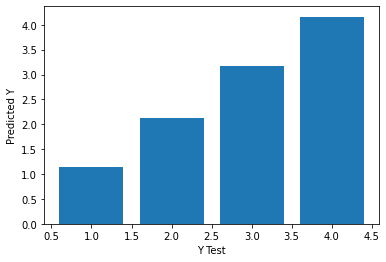

In [57]:
plt.bar(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [58]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,y_train)
predictions = lm.predict( X_test)

C:\Users\Nidhi Singh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Predicted Y')

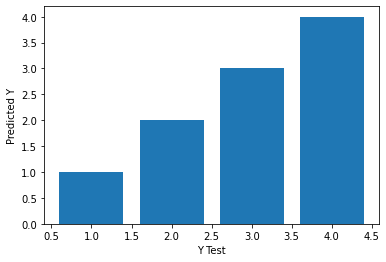

In [59]:
plt.bar(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [64]:
import pickle
pickle.dump(rfc, open('firstModel.sav', 'wb'))